In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

sales=pd.read_csv("/content/supermarket_sales.csv")

In [4]:

sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:

sales.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [6]:

sales.shape

(1000, 17)

In [7]:

sales.columns


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [8]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [9]:
sales['Time'] = pd.to_datetime(sales['Time'])

<ipython-input-9-a47ac6c36b15>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales['Time'] = pd.to_datetime(sales['Time'])


In [10]:

sales['Hour'] = (sales['Time']).dt.hour

In [11]:

sales['Hour'].nunique()

11

In [12]:

sales['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12], dtype=int32)

In [13]:

categorical_columns = [cname for cname in sales.columns if sales[cname].dtype == "object"]

In [14]:

categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Date',
 'Payment']

In [15]:

sales.dtypes

,0
Invoice ID,object
Branch,object
City,object
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,int64
Tax 5%,float64
Total,float64


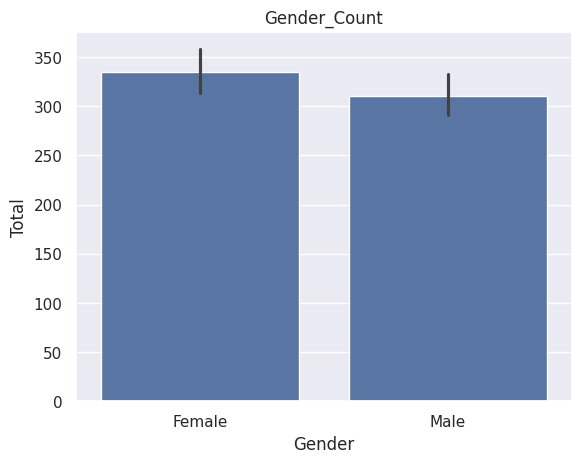

In [16]:
sns.set(style="darkgrid")
sns.barplot(x="Gender",y="Total", data =sales)
plt.title("Gender_Count")
plt.show()

Conclusion : By plotting this graph we have founded a Gender Count, in this graph we can see that there are more female customer in supermarket sales datasets.

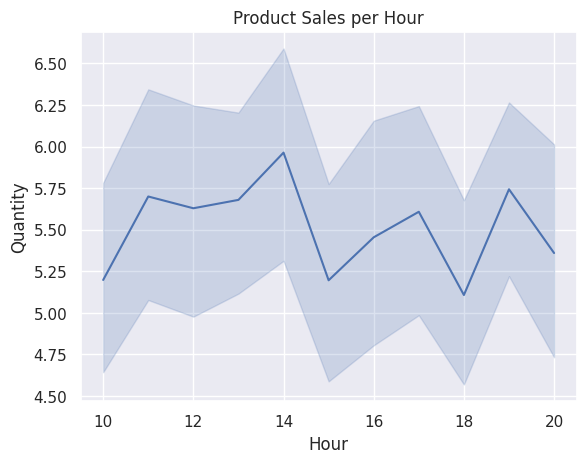

In [17]:

sns.lineplot(x="Hour",  y = 'Quantity',data =sales)
plt.title("Product Sales per Hour")
plt.show()



Conclusion : Below we can see how each branch's sales quantity looks like by the hour in a monthly fashion

In [18]:
sales.groupby(['Customer type']).agg({'Total':'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


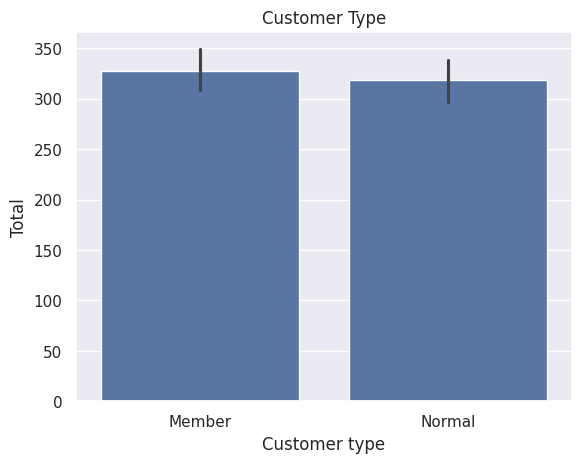

In [19]:

sns.barplot(x='Customer type', y='Total', data =sales)
plt.title("Customer Type")
plt.show()

Conclusion: In this data of customer type there are more member customers than normal customers. Member customer means a member who is at the time of admission to membership a Customer and is so designated by the Board Normal customer a person who purchases products or services from a person or business frequently

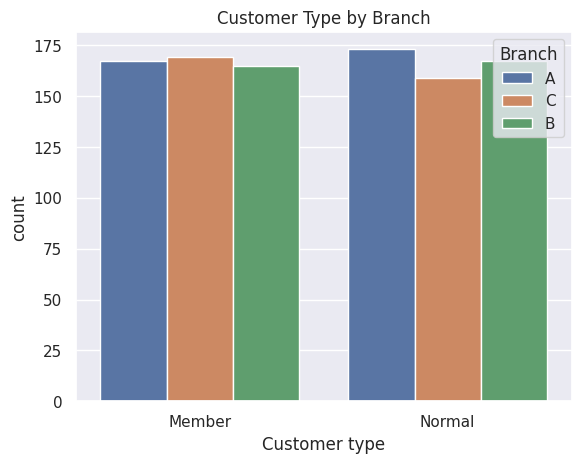

In [20]:
sns.countplot(x="Customer type", hue = "Branch", data =sales)
plt.title("Customer Type by Branch")
plt.show()

Conclusion: Branch C has more member customer and in branch A more normal customers.

In [21]:

#Products Analysis


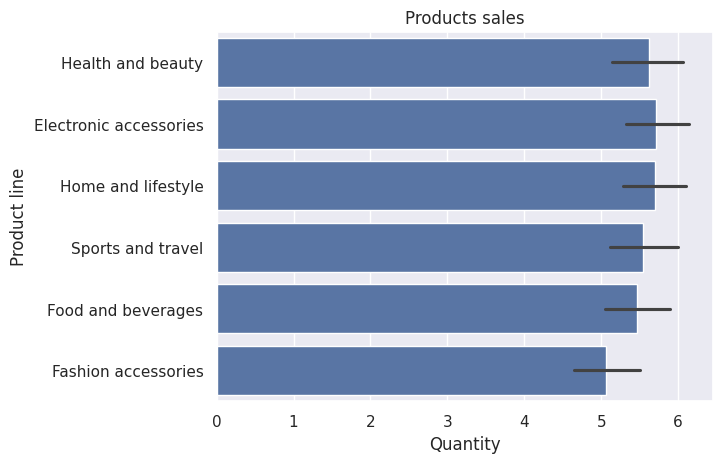

In [22]:
sns.barplot(y = 'Product line',x='Quantity',data=sales)
plt.title("Products sales")
plt.show()



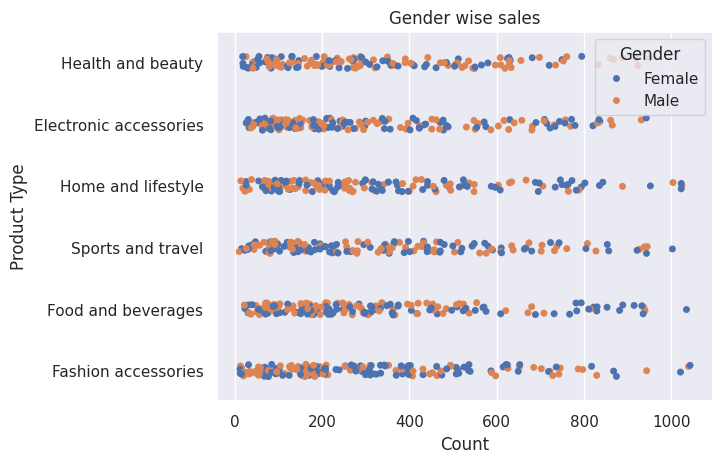

In [23]:

sns.stripplot(y ='Product line',x= 'Total', hue = "Gender", data = sales)
plt.title("Gender wise sales")
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

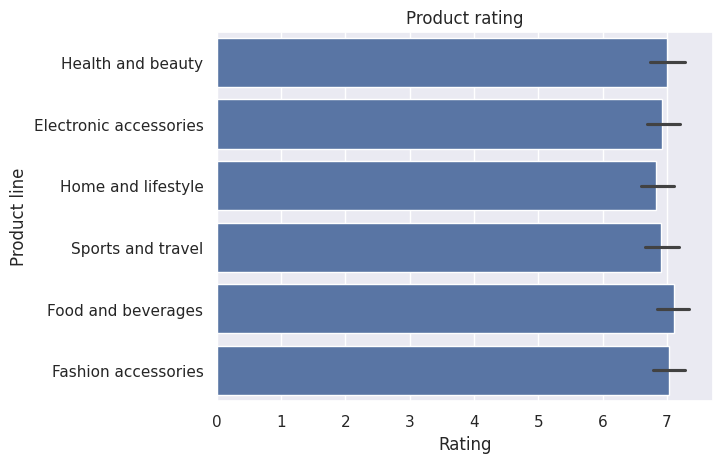

In [24]:

sns.barplot(x='Rating', y='Product line', data =sales)
plt.title("Product rating")
plt.show()

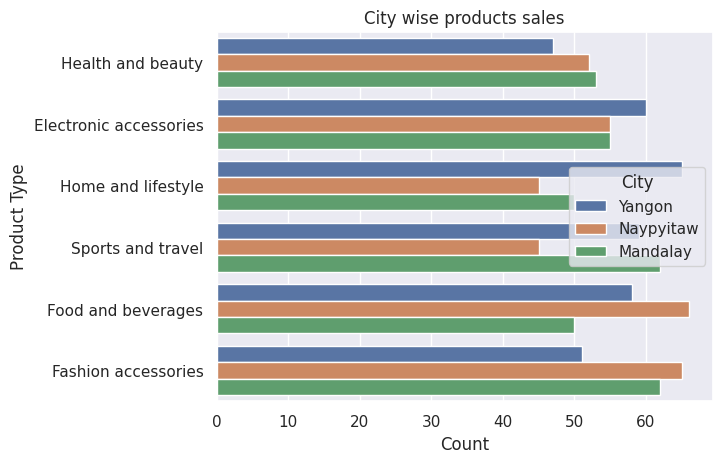

In [25]:

sns.countplot(y ='Product line', hue = "City", data = sales)
plt.title("City wise products sales")
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

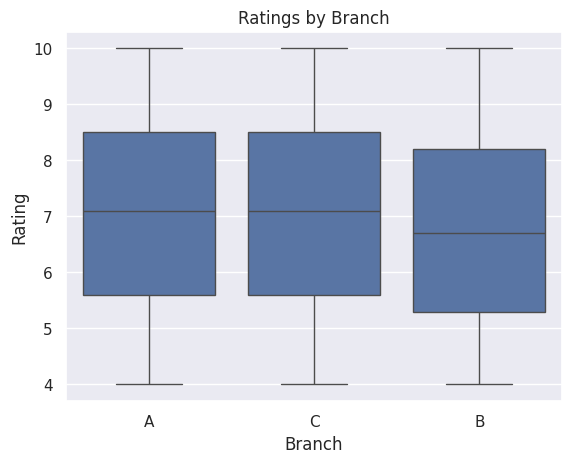

In [26]:
sns.boxplot(x="Branch", y = "Rating" ,data =sales)
plt.title("Ratings by Branch")
plt.show()


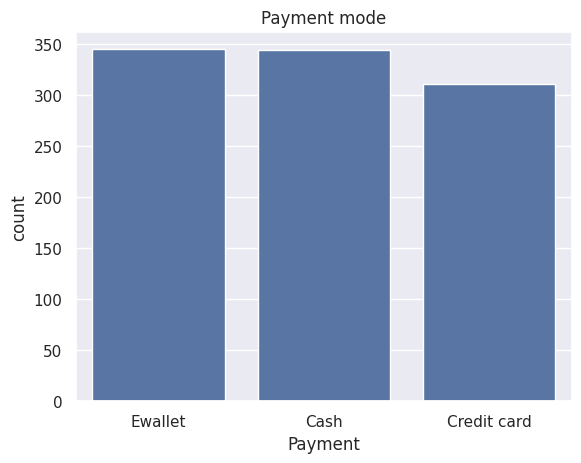

In [27]:
sns.countplot(x="Payment", data =sales)
plt.title("Payment mode")
plt.show()

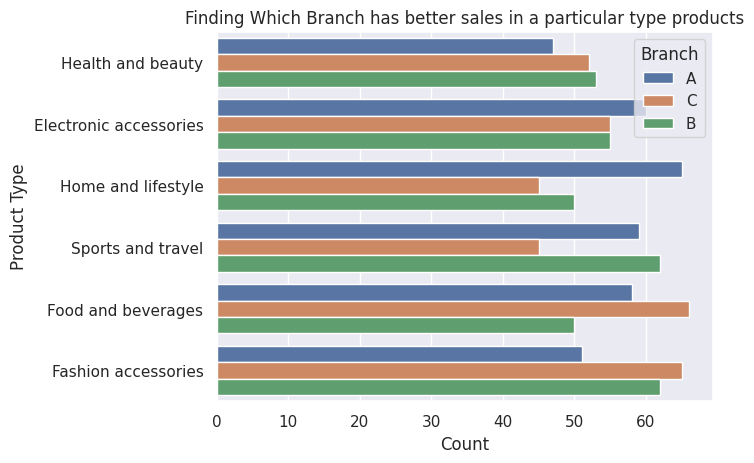

In [28]:
sns.countplot(y ='Product line', hue = "Branch", data = sales)
plt.title("Finding Which Branch has better sales in a particular type products")
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

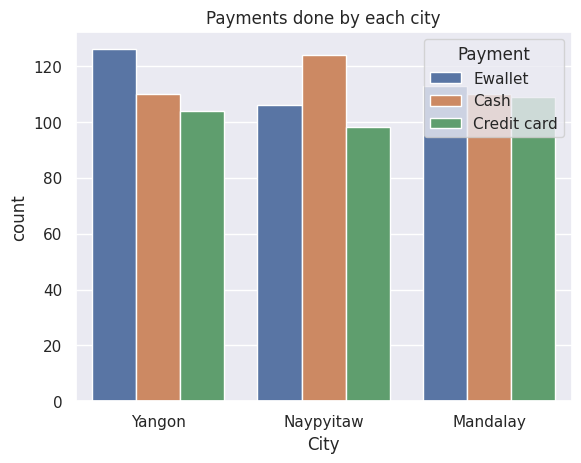

In [29]:
sns.countplot(x ='City', hue = "Payment", data = sales)
plt.title("Payments done by each city")
plt.show()


Conclusion: In this graph we are getting to know that which payment mode customer prefer to pay each city. We can see that there is more usage of Ewallet in Yangon city. In Naypyitaw city there is customers use more cash payment and in Mandalay city there customer use of Ewallat.